____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Cátedra de Investigación Operativa__\
__Autor: Martín Palazzo y Rodrigo Maranzana (Rmaranzana@frba.utn.edu.ar)__
____

# Simulación con distribución Exponencial

<h1>Índice<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introducción" data-toc-modified-id="Introducción-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introducción</a></span></li><li><span><a href="#Desarrollo" data-toc-modified-id="Desarrollo-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Desarrollo</a></span><ul class="toc-item"><li><span><a href="#Función-de-sampleo-(muestreo)-de-una-variable-aleatoria-con-distribución-exponencial" data-toc-modified-id="Función-de-sampleo-(muestreo)-de-una-variable-aleatoria-con-distribución-exponencial-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Función de sampleo (muestreo) de una variable aleatoria con distribución exponencial</a></span></li><li><span><a href="#Ejemplo-de-sampleo-de-variable-exponencial" data-toc-modified-id="Ejemplo-de-sampleo-de-variable-exponencial-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Ejemplo de sampleo de variable exponencial</a></span></li><li><span><a href="#Ejemplo:-cálculo-de-cantidad-de-autos-que-ingresan-por-hora-en-una-autopista" data-toc-modified-id="Ejemplo:-cálculo-de-cantidad-de-autos-que-ingresan-por-hora-en-una-autopista-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Ejemplo: cálculo de cantidad de autos que ingresan por hora en una autopista</a></span><ul class="toc-item"><li><span><a href="#Simulación-de-tiempos-de-arribo-como-variable-aleatoria-exponencial" data-toc-modified-id="Simulación-de-tiempos-de-arribo-como-variable-aleatoria-exponencial-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Simulación de tiempos de arribo como variable aleatoria exponencial</a></span></li><li><span><a href="#Tiempos-acumulados" data-toc-modified-id="Tiempos-acumulados-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Tiempos acumulados</a></span></li><li><span><a href="#Cantidad-de-arribos-por-hora" data-toc-modified-id="Cantidad-de-arribos-por-hora-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Cantidad de arribos por hora</a></span></li><li><span><a href="#Estadística-sobre-tiempo-entre-arribos" data-toc-modified-id="Estadística-sobre-tiempo-entre-arribos-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Estadística sobre tiempo entre arribos</a></span></li><li><span><a href="#Estadística-sobre-cantidad-de-arribos" data-toc-modified-id="Estadística-sobre-cantidad-de-arribos-2.3.5"><span class="toc-item-num">2.3.5&nbsp;&nbsp;</span>Estadística sobre cantidad de arribos</a></span></li></ul></li></ul></li><li><span><a href="#Conclusión" data-toc-modified-id="Conclusión-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Conclusión</a></span></li></ul></div>

## Introducción

El objetivo de este _Notebook_ es entender cómo se pueden simular valores de una variable aleatoria que sigue distribución exponencial. Ademas, hacer tratamiento de estos resultados obtenidos para obtener información relevante y comprender el uso de distintas librerías de Python.

Esta distribución posee la propiedad de no tener memoria. Es decir, las probabilidades no dependen de la historia que tuvo el proceso.

Por otro lado, esta distribución de probabilidad es sumamente útil para muchos casos que podemos encontrar en la realidad. Algunos ejemplos son: la gestión del mantenimiento industrial, en donde buscamos simular el tiempo entre fallas de una máquina; la teoría de filas de espera, donde el tiempo entre arribos o despachos de personas es la variable aleatoria de interés.

## Desarrollo

En primer lugar, importamos librerías de utilidad. Por un lado, _Random_ , _Numpy_ y _Math_ para el manejo matemático y de probabilidad; por el otro, _MatPlotLib_ y _Seaborn_ para graficar los resultados.

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### Función de sampleo (muestreo) de una variable aleatoria con distribución exponencial

Creamos una función para samplear/muestrear un valor de una variable exponencial. Como entrada, en primer lugar, la función nos pedirá el parámetro de tasa $\lambda$ del proceso. Este parámetro, por ejemplo, podría simbolizar la cantidad de eventos por unidad de tiempo. 

Además, ingresamos un valor de una variable aleatoria uniforme $u$, entre los valores 0 y 1. Esto se simboliza como:

$u \sim U(0, 1)$

Dentro de la función, calcularemos el valor de la variable aleatoria, que llamamos $t$ a través del método de la transformada inversa de la distribución exponencial, es decir:

$ t = - (1 \ / \ \lambda) \log{u}$

Por lo tanto t es una variable aleatoria distribuida exponencialmente, es decir:

$t \sim Exp(\lambda)$

En los ejercicios relacionados con investigación operativa, la variable aleatoria a simular con distribución exponencial será t y representará **el tiempo entre arribos** o **el tiempo entre despachos**. A continuación, lo programamos:

In [12]:
# Creamos la función de python llamada "samplear_exponencial". 
# Los inputs son "lam" y "r"
# El output de la función será la expresión matematica para calcular "t"
# la variable input "lam" es el lambda del problema
# la variable input "r" es un número aleatorio muestreado desde una distribución uniforme

def samplear_exponencial(lam, r):
    return - (1 / lam) * np.log(1-r)

### Ejemplo de sampleo de variable exponencial

Buscamos samplear un valor de una variable aleatoria exponencial con una media $\mu$ de 0.2. Recordemos que la media, o esperanza de la distribución exponencial es:

$\mathop{\mathbb{E}}[X] = 1 \ / \ \lambda$

Para entenderlo mejor, este valor de la esperanza podría simbolizar el tiempo medio entre eventos. Por lo tanto, $\lambda$ sería **la tasa de eventos por unidad de tiempo**.


In [13]:
# definimos el valor de la variable mu
mu = 0.2

# definimos el valor de la variable lamda
lam = 1 / mu

Para conseguir un valor de la variable aleatoria, simplemente tenemos que llamar a la función __samplear_exponencial__ creada anteriormente. Recordemos primero calcular los valores necesarios para alimentar la función, es decir, el valor del parámetro $\lambda$, escrito arriba, y un valor de la variable aleatoria uniforme.

In [16]:
# 1) Sampleo de variable aleatoria uniforme:
u = random.uniform(0.001, 0.999)
u = 0.41
lam = 3

# 2) Sampleo de variable aleatoria exponencial utilizando la función "samplear_exponencial" que definimos arriba
valor_exp = samplear_exponencial(lam, u)

# Imprimir valor:
print(f"Un valor de la variable aleatoria exponencial es t = {valor_exp}")

Un valor de la variable aleatoria exponencial es t = 0.1758775806941239


En el paso anterior muestreamos aleatoriamente una sola vez una distribución exponencial y obtuvimos un valor de t. Recordemos que _t_ es el tiempo entre eventos, estos eventos pueden ser arribos o despachos por ejemplo. En otras palabras simulamos una variable aleatoria solamente "en una iteración". Podriamos repetir el mismo proceso nuevamente para obtener otro numero de _t_ proveniente de la misma distribución exponencial. Repitiendo el proceso vamos a tener otro número de t ya que al inicio cuando muestreamos un valor de la distribución uniforme esta tomará un valor aleatorio que sera distinto al caso anterior. 

In [24]:
# 1) vuelvo a samplear la variable aleatoria uniforme:
u = random.uniform(0.001, 0.999)
    
# 2) utilizo el nuevo número aleatorio uniforme U 
# con ese nuevo valor de U lo utilizo como input de la función "samplear_exponencial"
# lambda sigue siendo el mismo ya que la distribución a simular sigue siendo la misma
valor_exp = samplear_exponencial(lam, u)

# Imprimir valor:
print(f"Un valor de la variable aleatoria exponencial es t = {valor_exp}")

Un valor de la variable aleatoria exponencial es t = 0.02293444529803619


### Ejemplo: cálculo de cantidad de autos que ingresan por hora en una autopista

Supongamos que buscamos calcular a través de simulación, la cantidad de autos que entran por un ingreso determinado de una autopista por hora. En primer lugar hacemos las siguientes suposiciones:

- Todos los vehículos son iguales.
- No hay horarios pico, el flujo de autos es siempre igual.
- El tiempo de arribos de vehículos sigue una distribución exponencial con una media de 0.2 horas.

Además sabemos que vamos a trabajar con una simulación de 200 autos ingresados.

#### Simulación de tiempos de arribo como variable aleatoria exponencial

Vamos a simular 200 tiempos de arribo de vehículos. Cabe aclarar, que cada uno de estos valores simulados son formalmente __"tiempo de arribo entre vehículos sucesivos"__. Es decir, representan el tiempo actual en el que ingresa un vehículo desde que ingresó el anterior. Por lo tanto, podemos pensarlos como tiempos relativos al último arribo.

Por ejemplo, si el primer tiempo arrojó 0.7 horas, y el segundo 0.2 horas. El segundo vehículo ingresó 0.2 horas luego del primero. Pensado de manera absoluta, el segundo vehículo ingresó a la suma de los dos tiempos, es decir, a las 0.9 horas.

In [25]:
n = 200
mu = 0.2

lam = 1 / mu

En primer lugar, creamos un vector de _Numpy_ lleno de ceros y con una longitud igual a la cantidad de sampleos a realizar.

In [26]:
tiempos = np.zeros(n)

In [27]:
#visualizamos en pantalla el vector tiempos
tiempos

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Dado que buscamos samplear/muestrear 200 tiempos, vamos a iterar 200 veces la función que creamos anteriormente y guardar su resultado en el vector de nombre __tiempos__ que creamos anteriormente. Podemos pensar a las iteraciones como eventos en donde ingresa un nuevo vehículo.

In [28]:
# hacemos un ciclo "for" donde la variable "i" iterará y tomará un valor escalonado entre "0" y "n" de 1 en 1
# en cada iteración del ciclo "for" simularemos distintos valores de tiempo entre arribos
for i in range(0, n):
    
    # Sampleo de variable aleatoria uniforme:
    u = random.uniform(0.001, 0.999)
    
    # Sampleo de variable aleatoria exponencial:
    tiempos[i] = samplear_exponencial(lam, u)

A continuación, vamos a imprimir los primeros 20 valores que sampleamos, es decir, acceder al vector __tiempos__. Solamente imprimimos los primeros 20, para evitar visualizar tantos números al mismo tiempo.

In [29]:
tiempos[0:20]

# Nota: recordemos que en Jupyter Notebook podemos visualizar simplemente ejecutando el nombre de un objeto.
# Esto no sucede en otro contexto, sino que tendremos que escribir print(tiempos[0:20])

array([0.42735856, 0.04383792, 0.11381413, 0.83156299, 0.13470239,
       0.28863916, 0.28931322, 0.00851164, 0.09290394, 0.34265613,
       0.36570844, 0.12277031, 0.33325827, 0.21910081, 0.30861817,
       0.04134803, 0.16795258, 0.24705066, 0.28819604, 0.19083342])

Vamos a utilizar el gráfico de barras de la librería _MatPlotLib_ para visualizar los valores obtenidos a través de cada una de las iteraciones en el vector __tiempos__. Es decir, el eje _x_ del gráfico serán las iteraciones y el _y_ el valor de la variable aleatoria correspondiente.

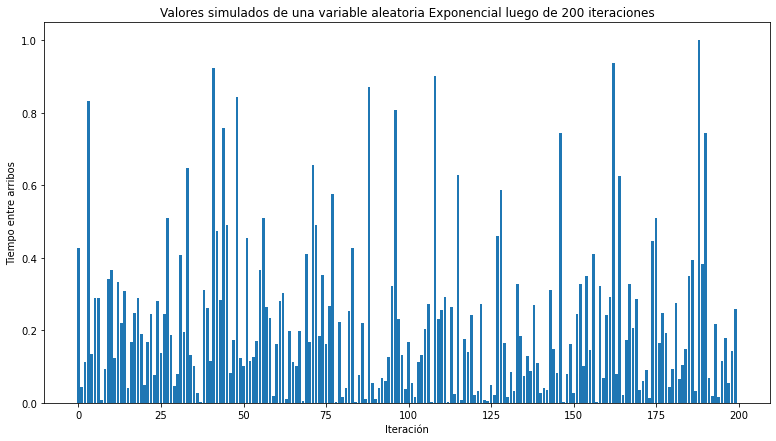

In [30]:
# Creamos una figura y el gráfico de barras:
plt.figure(figsize=(13,7))
plt.bar(range(0,n), tiempos)

# Seteamos título y etiquetas de los ejes:
plt.title(f'Valores simulados de una variable aleatoria Exponencial luego de {n} iteraciones')
plt.ylabel('Tiempo entre arribos')
plt.xlabel('Iteración')

# Mostramos el gráfico:
plt.show()

#### Tiempos acumulados

En este punto buscamos calcular los tiempos acumulados en cada iteración. Como dijimos en el título anterior, es lo que más nos interesa a la hora de poder entender las simulaciones. Dado que lo simulado es el "tiempo entre arribos", si queremos conocer la hora a la que ingresó un determinado vehículo, necesitamos conocer el acumulado.

Creamos un vector de _Numpy_ lleno de ceros, de longitud de iteraciones, que va a contener los tiempos acumulados en cada iteración. El valor de la primera posición del vector, será el primer valor generado en el vector __tiempos__.

In [31]:
# Creamos un vector de ceros:
t_acumulado = np.zeros(n)

# Cargamos el primer valor como el primer sampleo de tiempos:
t_acumulado[0] = tiempos[0]

Luego, comenzamos a llenar el vector con los valores acumulados. 

Esto se hace iterando en un ciclo __for__. Dado un índice cualquiera $j$, sumamos el valor del vector __t_acumulado__ en el índice anterior $j-1$ al sampleo hecho en el vector __tiempos__ en el índice $j$ actual.

In [32]:
for j in range(1, n):
    t_acumulado[j] = tiempos[j] + t_acumulado[j-1]

A continuación, vamos a imprimir los primeros 20 valores acumulados de la misma forma que hicimos anteriormente.

In [33]:
t_acumulado[0:20]

array([0.42735856, 0.47119648, 0.58501061, 1.41657359, 1.55127599,
       1.83991515, 2.12922838, 2.13774002, 2.23064396, 2.57330009,
       2.93900853, 3.06177885, 3.39503711, 3.61413792, 3.92275609,
       3.96410412, 4.13205669, 4.37910735, 4.66730339, 4.85813682])

De la misma manera que hicimos con las simulaciones, visualizamos los tiempos acumulados por cada iteración con un gráfico de barras.

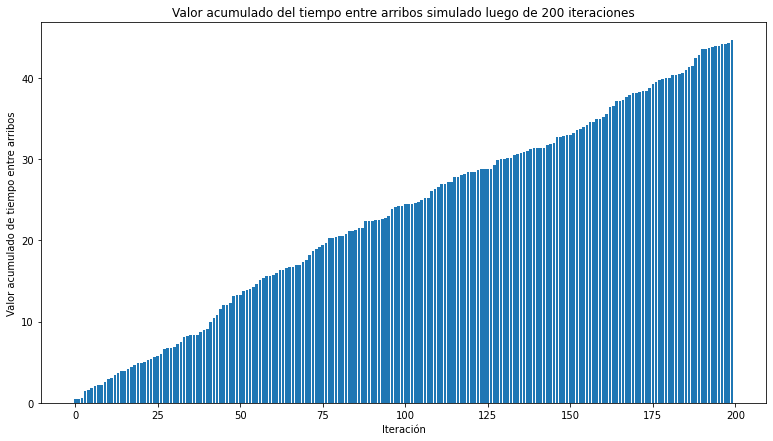

In [34]:
# Creamos una figura y el gráfico de barras:
plt.figure(figsize=(13,7))
plt.bar(range(0, n), t_acumulado)

# Seteamos título y etiquetas de los ejes:
plt.title(f'Valor acumulado del tiempo entre arribos simulado luego de {n} iteraciones')
plt.ylabel('Valor acumulado de tiempo entre arribos')
plt.xlabel('Iteración')

# Mostramos el gráfico:
plt.show()

#### Cantidad de arribos por hora

En este apartado vamos a utilizar el vector de tiempos acumulados __t_acumulado__ para calcular cuantos arribos hubo por hora.

Dado que en el vector de tiempos acumulados conocemos para cada vehículo ingresado su tiempo absoluto de arribo, solamente necesitamos clasificarlos según su hora de llegada.

Vamos a crear un vector, en el cual cada índice represente una hora de llegada. Por ejemplo, el índice 0, serán los vehículos ingresados desde la hora 0 a la 1.

Revisando el vector __t_acumulado__, sabemos que tenemos acumuladas más de 40 horas absolutas. Al estar ordenados de manera ascendente, podemos revisar la hora de corte en el último valor. Esta hora determina el tamaño del vector de cantidades que queremos armar. En otras palabras, tendremos tantas posiciones como horas enteras registradas y en cada una contaremos la cantidad de vehículos encontrados.

In [35]:
# Creamos un vector donde cada índice representa la hora de llegada.
ult_hora = t_acumulado[-1]
horas = int(ult_hora)
arribos_horas = np.zeros(horas + 1).astype(int)

Vamos a iterar para cada vehículo simulado y obtener el valor de tiempo absoluto (acumulado) en el que arribó.

Una manera rápida de poder clasificarlo, es tomar la parte entera del valor de tiempo de arribo. Es decir si el vehículo ingresó a las 3.25, sabemos que pertenece a la clasificación de la hora 3.

A continuación, usamos la hora que encontramos como índice del vector __arribos_horas__ y lo incrementamos en una unidad. Esto quiere decir que un vehículo más ingresó a esa hora.

In [36]:
for i in range(0, n):
    # Extraemos el valor acumulado en el arribo i:
    h = t_acumulado[i]
    
    # Sacamos la parte entera, para saber a qué hora pertenece:
    h_i = int(h)
    
    # Buscamos el índice correspondiente a esa hora y le sumamos 1.
    arribos_horas[h_i] = arribos_horas[h_i] + 1

Imprimimos los primeros 15 valores encontrados por un tema de facilidad de visualización.

In [37]:
arribos_horas[0:15]

array([3, 3, 5, 5, 5, 5, 5, 2, 7, 1, 3, 1, 3, 5, 3])

Ahora procederemos a graficar el vector __arribos_horas__ en sus primeros 15 valores.

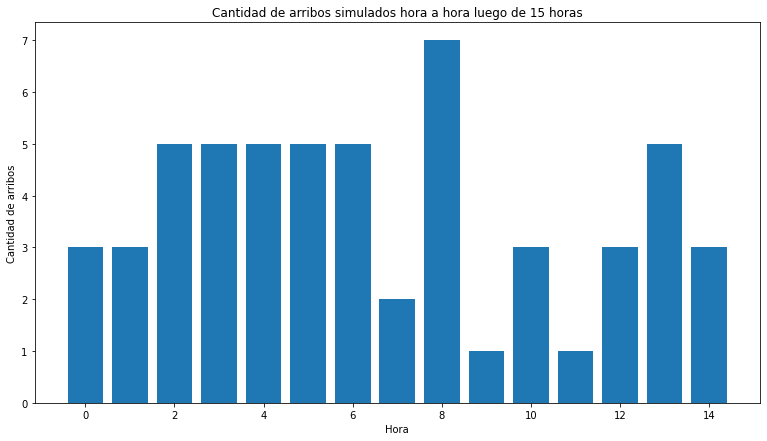

In [38]:
horas_vis = 15

# Creamos una figura y el gráfico de barras:
plt.figure(figsize=(13,7))
plt.bar(range(0, horas_vis), arribos_horas[0:horas_vis])

# Seteamos título y etiquetas de los ejes:
plt.title(f'Cantidad de arribos simulados hora a hora luego de {horas_vis} horas')
plt.ylabel('Cantidad de arribos')
plt.xlabel('Hora')

# Mostramos el gráfico:
plt.show()

#### Estadística sobre tiempo entre arribos

En esta sección queremos visualizar que las simulaciones que estamos creando coincidan con la densidad teórica que supusimos al principio.

Vamos a graficar un Histograma de los tiempos entre arribos simulados. Luego, graficamos encima la densidad de probabilidad teórica, en este caso la Exponencial con un parámetro $\lambda$ de 0.2.

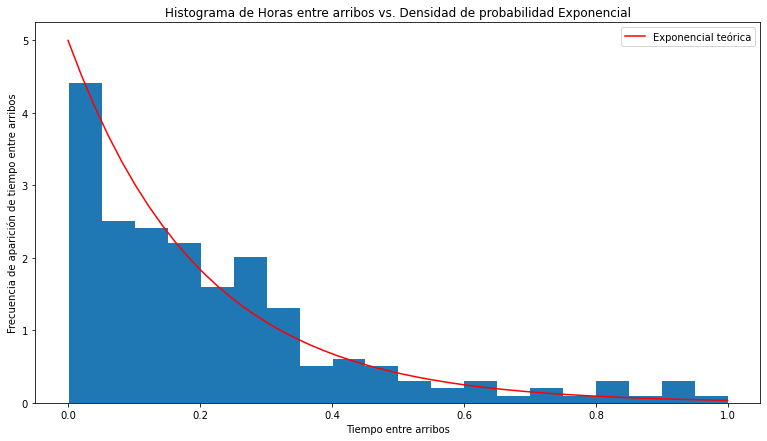

In [39]:
# Creamos una figura:
plt.figure(figsize=(13,7))

# Densidad exponencial teórica:
xvals = np.linspace(0, np.max(tiempos))
yvals = stats.expon.pdf(xvals, scale=0.2)

plt.plot(xvals, yvals, c='r', label='Exponencial teórica')
plt.legend()

# Histograma normalizado de valores de tiempos:
plt.hist(tiempos, density=True, bins=20, label='Frecuencias de tiempos')

# Formato de gráfico:
plt.title('Histograma de Horas entre arribos vs. Densidad de probabilidad Exponencial')
plt.ylabel('Frecuencia de aparición de tiempo entre arribos')
plt.xlabel('Tiempo entre arribos')

# Visualizamos:
plt.show()

Además de observar que la función teórica exponencial se ajusta a los valores del histograma, podemos ver cómo se distribuyen alrededor de la media teórica que establecimos al principio.

#### Estadística sobre cantidad de arribos

En este caso, hacemos lo mismo que antes. Graficamos un histograma de la cantidad de arribos. Luego, construimos la función de masa de probabilidad de Poisson encima.

Debemos usar esta función ya que es la que se relaciona íntimamente con la distribución exponencial. Es sabido, teóricamente que cuando los tiempos entre arribos se distribuyen exponencialmente, las cantidades de arribos lo hacen con la de Poisson.

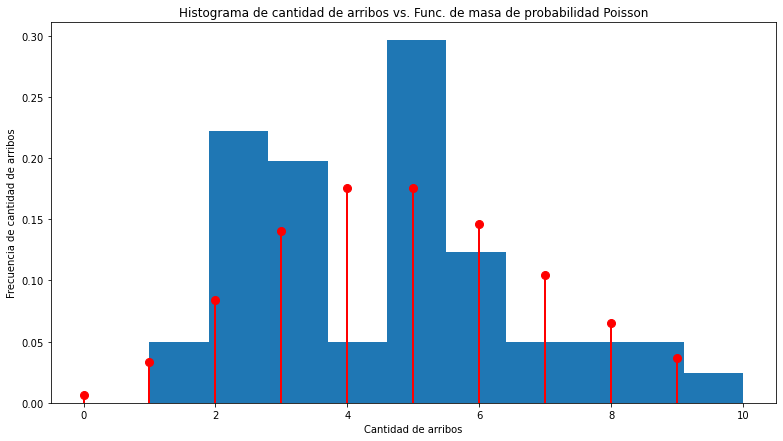

In [40]:
# Creamos una figura:
plt.figure(figsize=(13,7))



# Histograma normalizado de valores de tiempos:
plt.hist(arribos_horas, density=True, bins=np.max(arribos_horas), label='Frecuencias de cantidad de arribos')

# Función de masa de probabilidad poisson teórica:
xvals = range(0, np.max(arribos_horas))
yvals = stats.poisson.pmf(xvals, mu=5)
plt.plot(xvals, yvals, 'ro', ms=8, mec='r')
plt.vlines(xvals, 0, yvals, colors='r', linestyles='-', lw=2)

# Formato de gráfico:
plt.title('Histograma de cantidad de arribos vs. Func. de masa de probabilidad Poisson')
plt.ylabel('Frecuencia de cantidad de arribos')
plt.xlabel('Cantidad de arribos')

# Visualizamos:
plt.show()

Una vez más, en este caso, además de observar que la función de masa se ajusta a los valores del histograma, podemos ver cómo se distribuyen alrededor de la media teórica que establecimos al principio.

## Conclusión

En este Notebook pudimos observar correctamente cómo simular valores de una variable aleatoria distribuida exponencialmente. Además, comprobamos gráficamente los resultados relacionando los valores obtenidos con sus distribuciones teóricas.

Estos métodos serán útiles en el futuro para poder hacer simulaciones más complejas de filas de espera, procesos industriales conectados o mantenimiento de máquinas.

A modo de discusión, queda preguntarse, 
¿Qué otras distribuciones pueden samplearse con el método de la transformada inversa?
Dado que otra distribución ampliamente utilizada en casos prácticos es la Normal ¿podríamos hacer lo mismo que hicimos en este Notebook?